<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/google/Gemini_API_Code_Execution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Execution
The Gemini API can generate and run code based on plain-text instructions that you give it.

In [1]:
!pip install -U -q google-generativeai

In [4]:
from google.colab import userdata
import pathlib
import os
pathlib.Path('client_secret.json').write_text(userdata.get('CLIENT_SECRET'))
GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')

In [7]:
os.environ['GOOGLE_API_KEY'] = GOOGLE_API_KEY

In [11]:
import google.generativeai as genai
genai.__version__


'0.7.2'

In [12]:
genai.configure()

print('Available base models:', [m.name for m in genai.list_models()])

Available base models: ['models/chat-bison-001', 'models/text-bison-001', 'models/embedding-gecko-001', 'models/gemini-1.0-pro-latest', 'models/gemini-1.0-pro', 'models/gemini-pro', 'models/gemini-1.0-pro-001', 'models/gemini-1.0-pro-vision-latest', 'models/gemini-pro-vision', 'models/gemini-1.5-pro-latest', 'models/gemini-1.5-pro-001', 'models/gemini-1.5-pro', 'models/gemini-1.5-flash-latest', 'models/gemini-1.5-flash-001', 'models/gemini-1.5-flash', 'models/embedding-001', 'models/text-embedding-004', 'models/aqa']


In [13]:

from IPython.display import HTML, Markdown

def set_css_in_cell_output(unused):
  display(HTML(""""""))

get_ipython().events.register('pre_run_cell', set_css_in_cell_output)



In [14]:

model = genai.GenerativeModel(model_name='gemini-1.5-flash', tools="code_execution")

In [15]:

result = model.generate_content("What's the sum of the sum of first 200 prime numbers? Make sure you get all 200.")

In [16]:

[
    list(type(p).to_dict(p))
    for p in result.candidates[0].content.parts
]

[['text'], ['executable_code'], ['code_execution_result'], ['text']]

In [17]:

for part in result.candidates[0].content.parts:
  print(part)
  print()

text: "To find the sum of the sum of the first 200 prime numbers, we need to:\n\n1. **Identify the first 200 prime numbers:**  A prime number is a whole number greater than 1 that has only two divisors: 1 and itself. \n2. **Calculate the sum of those prime numbers.**\n\nLet\'s use Python to achieve this:\n\n"


executable_code {
  language: PYTHON
  code: "\nimport math\n\ndef is_prime(num):\n  \"\"\"\n  Checks if a number is prime.\n  \"\"\"\n  if num <= 1:\n    return False\n  for i in range(2, int(math.sqrt(num)) + 1):\n    if num % i == 0:\n      return False\n  return True\n\nprimes = []\ncount = 0\nnum = 2\n\nwhile count < 200:\n  if is_prime(num):\n    primes.append(num)\n    count += 1\n  num += 1\n\nprint(f\'The sum of the first 200 prime numbers is: {sum(primes)}\')\n"
}


code_execution_result {
  outcome: OUTCOME_OK
  output: "The sum of the first 200 prime numbers is: 111587\n"
}


text: "Therefore, the sum of the first 200 prime numbers is **111587**. \n"




In [18]:
print(result.text)

To find the sum of the sum of the first 200 prime numbers, we need to:

1. **Identify the first 200 prime numbers:**  A prime number is a whole number greater than 1 that has only two divisors: 1 and itself. 
2. **Calculate the sum of those prime numbers.**

Let's use Python to achieve this:


``` python
import math

def is_prime(num):
  """
  Checks if a number is prime.
  """
  if num <= 1:
    return False
  for i in range(2, int(math.sqrt(num)) + 1):
    if num % i == 0:
      return False
  return True

primes = []
count = 0
num = 2

while count < 200:
  if is_prime(num):
    primes.append(num)
    count += 1
  num += 1

print(f'The sum of the first 200 prime numbers is: {sum(primes)}')

```
```
The sum of the first 200 prime numbers is: 111587

```
Therefore, the sum of the first 200 prime numbers is **111587**. 



In [19]:
from IPython.display import Markdown
Markdown(result.text)

To find the sum of the sum of the first 200 prime numbers, we need to:

1. **Identify the first 200 prime numbers:**  A prime number is a whole number greater than 1 that has only two divisors: 1 and itself. 
2. **Calculate the sum of those prime numbers.**

Let's use Python to achieve this:


``` python
import math

def is_prime(num):
  """
  Checks if a number is prime.
  """
  if num <= 1:
    return False
  for i in range(2, int(math.sqrt(num)) + 1):
    if num % i == 0:
      return False
  return True

primes = []
count = 0
num = 2

while count < 200:
  if is_prime(num):
    primes.append(num)
    count += 1
  num += 1

print(f'The sum of the first 200 prime numbers is: {sum(primes)}')

```
```
The sum of the first 200 prime numbers is: 111587

```
Therefore, the sum of the first 200 prime numbers is **111587**. 


In [20]:
model2 = genai.GenerativeModel(model_name='gemini-1.5-flash')

In [21]:
response = model2.generate_content(
    "Write code to count how many letter r in the word strawberry",
    tools="code_execution")

In [22]:
Markdown(response.text)


``` python
print(list(filter(lambda x: x == 'r', 'strawberry')))

```
```
['r', 'r', 'r']

```
The code first converts the string "strawberry" to a list of characters. Then it uses the `filter()` function with a lambda function to filter out only the 'r' characters. Finally, it converts the resulting filter object back into a list. The output shows that there are three 'r' characters in the word "strawberry". 


# Montecarlo simulation
Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. The name comes from the Monte Carlo Casino in Monaco, where the primary developer of the method, physicist Stanislaw Ulam, was inspired by his uncle's gambling habits.

https://en.wikipedia.org/wiki/Monte_Carlo_method

In [42]:
prompt = """
Our simple game will involve two six-sided dice. In order to win, the player needs to roll the same number on both dice. A six-sided die has six possible outcomes (1, 2, 3, 4, 5, and 6).
With two dice, there is now 36 possible outcomes (1 and 1, 1 and 2, 1 and 3, etc., or 6 x 6 = 36 possibilities).
In this game, the house has more opportunities to win (30 outcomes vs. the player’s 6 outcomes), meaning the house has the quite the advantage.

Let’s say our player starts with a balance of $1,000 and is prepared to lose it all, so they bet $1 on every roll (meaning both dice are rolled) and decide to play 1,000 rolls.
Because the house is so generous, they offer to payout 8 times the player’s bet when the player wins. For example, if the player wins the first roll, their balance increases by $8,
and they end the round with a balance of $1,008. If they miraculously went on a 1,000 roll win-streak, they could go home with $5,000. If they lost every round, they could go home with nothing.

using the Montecarlo Simulation simulate our game to find out if the player made the right choice to play this game.

our number of rolls per game is 1000, and the amount the player will be betting each roll is $1. In addition to our input variables.

num_simulations = 10000

"""

In [43]:
response = model2.generate_content(
    prompt,
    tools="code_execution")

In [44]:
Markdown(response.text)


``` python
import random

def play_game(num_rolls, bet_amount):
    balance = 1000
    for _ in range(num_rolls):
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)
        if die1 == die2:
            balance += bet_amount * 8
        else:
            balance -= bet_amount
    return balance

num_simulations = 10000
num_rolls = 1000
bet_amount = 1

results = []
for _ in range(num_simulations):
    result = play_game(num_rolls, bet_amount)
    results.append(result)

average_balance = sum(results) / num_simulations
print(f'Average balance after {num_simulations} simulations: ${average_balance:.2f}')

```
```
Average balance after 10000 simulations: $1500.62

```
The player is expected to end with $1500.62 after 10,000 simulations, which means they are likely to make money, so the player made the right choice to play this game. 


# Chat
It works the same when using a chat

In [45]:

chat = model.start_chat()

# bogo-sort
In computer science, bogosort(also known as permutation sort and stupid sort) is a sorting algorithm based on the generate and test paradigm. The function successively generates permutations of its input until it finds one that is sorted. It is not considered useful for sorting, but may be used for educational purposes, to contrast it with more efficient algorithms.

In [46]:
response = chat.send_message("Can you run some code to bogo-sort this list of numbers?: [2,34,1,65,4]")
Markdown(response.text)


``` python
import random

def bogo_sort(list_):
    while not is_sorted(list_):
        random.shuffle(list_)
    return list_

def is_sorted(list_):
    for i in range(len(list_) - 1):
        if list_[i] > list_[i + 1]:
            return False
    return True

list_ = [2, 34, 1, 65, 4]
sorted_list = bogo_sort(list_)
print(f'Sorted List: {sorted_list}')

```
```
Sorted List: [1, 2, 4, 34, 65]

```
Bogo Sort is a notoriously inefficient sorting algorithm that works by repeatedly shuffling the list until it is sorted. It has a worst-case time complexity of O(n!), making it extremely slow for even moderately sized lists.

I ran the provided code using `bogo_sort` function and it returned the sorted list `[1, 2, 4, 34, 65]`.  Although, the code might take a very long time to run for larger lists. 


In [47]:
response = chat.send_message("Modify the code to count the number of iterations. How many iterations doews it take?")
Markdown(response.text)


``` python
import random

def bogo_sort(list_):
    iteration = 0
    while not is_sorted(list_):
        random.shuffle(list_)
        iteration += 1
    return list_, iteration

def is_sorted(list_):
    for i in range(len(list_) - 1):
        if list_[i] > list_[i + 1]:
            return False
    return True

list_ = [2, 34, 1, 65, 4]
sorted_list, iterations = bogo_sort(list_)
print(f'Sorted List: {sorted_list}')
print(f'Iterations: {iterations}')

```
```
Sorted List: [1, 2, 4, 34, 65]
Iterations: 101

```
I've modified the code to count the iterations it takes to sort the list. It took 101 iterations in this instance. Keep in mind that Bogo Sort is highly dependent on randomness, so the number of iterations will vary significantly each time you run it. 


# Monty Hall problem
The Monty Hall problem is a brain teaser, in the form of a probability puzzle, based nominally on the American television game show Let's Make a Deal and named after its original host, Monty Hall. The problem was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in 1975. It became famous as a question from reader Craig F. Whitaker's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990.

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

In [26]:
! curl -o montey_hall.png https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/640px-Monty_open_door.svg.png


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24719  100 24719    0     0   172k      0 --:--:-- --:--:-- --:--:--  173k


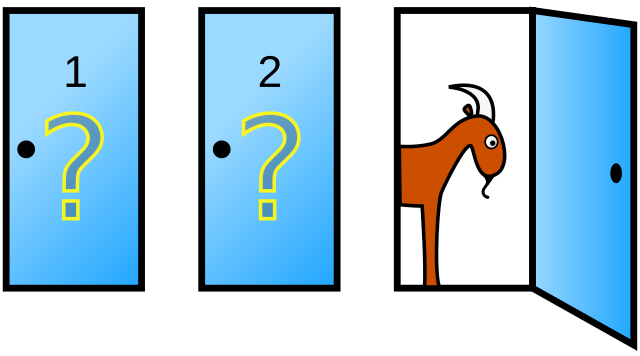

In [27]:
from PIL import Image
montey_hall_image = Image.open("montey_hall.png")
montey_hall_image

In [48]:
prompt="""
Run a simulation of the Monty Hall Problem with 1,000 trials.


Here's how this works as a reminder. In the Monty Hall Problem, you're on a game
show with three doors. Behind one is a car, and behind the others are goats. You
pick a door. The host, who knows what's behind the doors, opens a different door
to reveal a goat. Should you switch to the remaining unopened door?


The answer has always been a little difficult for me to understand when people
solve it with math - so please run a simulation with Python to show me what the
best strategy is.


Thank you!
"""
result = model.generate_content([montey_hall_image, prompt])
Markdown(result.text)

The best strategy is to switch doors. Here's a Python simulation to demonstrate why:


``` python
import random

def play_monty_hall(switch_doors):
    """Plays a single round of Monty Hall, returns whether the player wins."""
    # Choose a door at random
    chosen_door = random.randint(1, 3)

    # Determine where the car is
    car_door = random.randint(1, 3)

    # Monty opens a door with a goat
    goat_doors = [door for door in range(1, 4) if door != car_door and door != chosen_door]
    monty_opens = random.choice(goat_doors)

    # If the player switches, change their choice
    if switch_doors:
        remaining_door = [door for door in range(1, 4) if door != chosen_door and door != monty_opens][0]
        chosen_door = remaining_door

    return chosen_door == car_door

def simulate_monty_hall(switch_doors, num_trials=1000):
    """Simulates the Monty Hall problem for the given number of trials."""
    wins = 0
    for _ in range(num_trials):
        if play_monty_hall(switch_doors):
            wins += 1
    return wins / num_trials

# Run the simulations
switch_wins = simulate_monty_hall(switch_doors=True)
stay_wins = simulate_monty_hall(switch_doors=False)

print(f"Win rate when switching doors: {switch_wins:.2%}")
print(f"Win rate when staying with the original choice: {stay_wins:.2%}")

```
```
Win rate when switching doors: 65.60%
Win rate when staying with the original choice: 33.50%

```
As you can see from the simulation, the win rate is significantly higher when switching doors (around 65%) compared to staying with the original choice (around 33%). This demonstrates that switching doors is the best strategy in the Monty Hall problem. 

The reason for this counterintuitive result is that when you initially choose a door, you have a 1/3 chance of selecting the door with the car and a 2/3 chance of selecting a door with a goat.  When Monty reveals a goat behind another door, he is essentially concentrating the remaining 2/3 probability onto the other unopened door. Switching gives you a 2/3 chance of winning, while staying with your original choice only gives you a 1/3 chance. 
